### ``str`` function: compactly display the internal structure of an R object
- it is a diagnostic function and an alternative to *summary* function
- ``str(functionname)``

**Markdown Toggle List Syntax**
```
<details>
    <summary> The toggle heading (basically the gist) </summary>
    <!-- The content in the toggle goes here -->
</details>
```

In [3]:
x <- rnorm(40, 2, 3)
x

[1] -5.2617963  7.5278173  5.3795018 -1.4055156  7.5974643  2.4566733
 [7]  4.9826405  8.0215785  5.0624346  2.8826243 -4.6993827  1.9114559
[13]  2.7754916 -0.8476152  2.4977435  0.3019079 -2.1368475  1.7268642
[19] -1.6240053  2.3993560  3.8856918  7.4328579  0.9821372  0.5173633
[25] -1.5597672  0.5130535  5.1571407 -0.7141157  1.8439359  1.1502291
[31]  2.1263424  1.0733653  3.2551028  6.1266636 -2.5481838  0.8690413
[37] -1.3294837  3.2184094 -2.2525579  0.9731801

In [4]:
str(x)

 num [1:40] -5.26 7.53 5.38 -1.41 7.6 ...


In [5]:
summary(x)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.2618 -0.7475  1.7854  1.7567  3.4127  8.0216 

### Simulation


<details>
    <summary>Generating Random Numbers</summary>
    1. ``rnorm``: generate random normal variates with a given mean and std deviation
    2. ``dnorm``: evaluate the normal probability density (with a given mean/SD) at a point (or vector of points)
    3. ``pnorm``: evaluate the cumulative distribution function for a Normal distribution
    4. ``rpois``: generate random Poisson variates with a given rate
</details>

**Prefix**
1. ``d`` for density
2. ``r`` for random number generation
3. ``p`` for cumulative distribution
4. ``q`` for quantile function

**Normal Distribution**

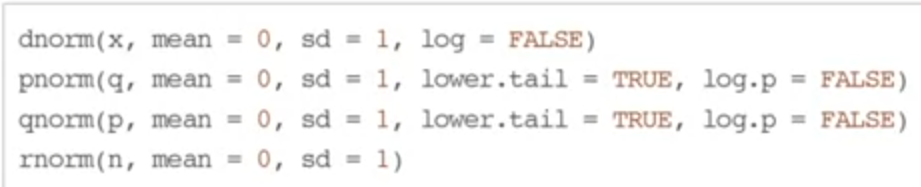

In [6]:
# to ensure reproducibility, you should use seed function (pseudo random)
set.seed(1)
rnorm(5)

[1] -0.6264538  0.1836433 -0.8356286  1.5952808  0.3295078

### Generating Random Numbers from a linear model

$y=\beta_o + \beta_1x+\epsilon$

In [7]:
set.seed(20)
x <- rnorm(100)
e <- rnorm(100, 0, 2)

In [8]:
y <- 2 + 3*x + e

In [10]:
summary(y)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-6.8891 -0.6344  2.4686  2.1942  4.9436  9.9845 

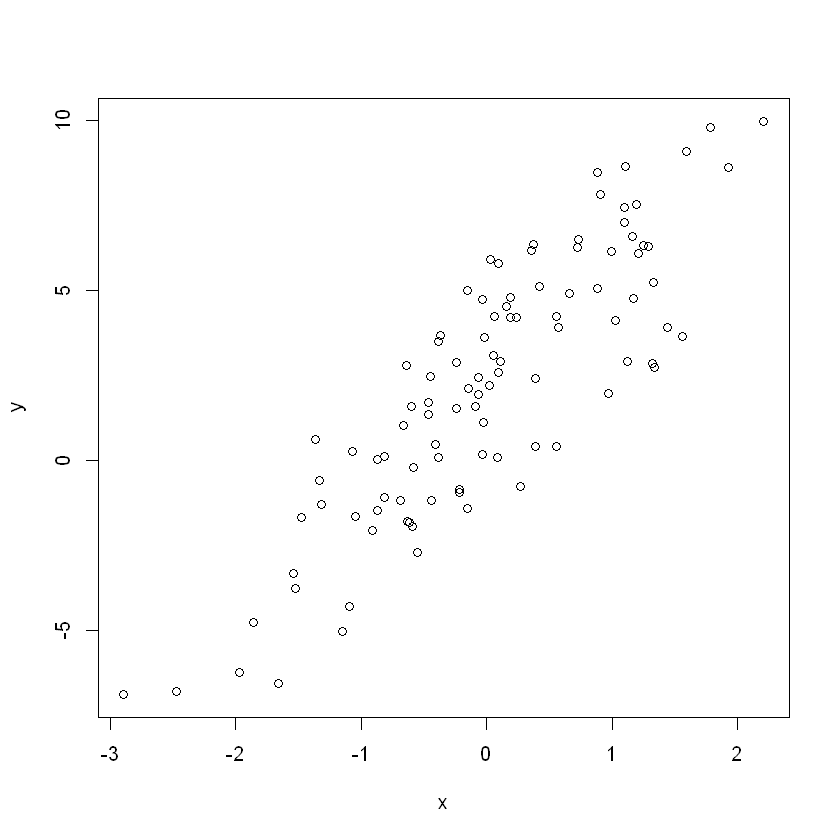

In [11]:
plot(x, y)

In [13]:
# Random sampling
set.seed(5)
sample(1:50, 10, replace=TRUE) # sample with replacement

[1]  2 43 15 11 41 21 30  7 19  3

### R-Profiler
- profiling is a systematic way to examine how much time is spend in different parts of a program
- useful for optimizing the code
- profiling is better than guessing

**Methods 1: ``system.time()``**
- takes an arbitrary R expression as input and return the amount of time taken to evaluate the expression
- returns an object of class *proc_time*
    - user time: time charged to the CPU for this expression
    - elapsed time: "wall clock" time

In [16]:
system.time(rnorm(1000000,500,20000))

   user  system elapsed 
   0.11    0.00    0.11 

In [17]:
# for longer expression
system.time({
    n <- 1000
    r <- numeric(n)
    for (i in 1:n) {
        x <- rnorm(n)
        r[i] <- mean(x)
    }
})

   user  system elapsed 
   0.12    0.00    0.12 

**Methods 2**

Using the ``Rprof()`` function
- R must be compiled with profiler support
- it summarized the output from ``Rprof()`` (otherwise it is not readable)
- if your code runs very quickly, the prifiler is not useful

**Methods 3**
Using the ``summaryRprof()`` function
- it tabulates the R profiler output and calculates how much time is spend in which function
- methods for normalizing the data
    1. ``by.total`` divides the time spend in each function by the total run time
    2. ``by.self`` does the same but first subtracts out time spent in functions above in the call stack (more accurate)

### Quiz

In [18]:
# question 1
set.seed(1)
rpois(5, 2)

[1] 1 1 2 4 1

In [19]:
# question 8
library(datasets)
Rprof()
fit <- lm(y ~ x1 + x2)
Rprof(NULL)

ERROR: Error in eval(predvars, data, env): object 'x1' not found
